<a href="https://colab.research.google.com/github/TonyGlimm/Electricity-Production-Forecasting/blob/main/Electricity_Production_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd 
import numpy as np

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


## Loading Data

In [ ]:
col_names =['date', 'amount']
df = pd.read_csv('drive/My Drive/Colab Notebooks/data_electricity/Electric_Production.csv',names = col_names,header=0, parse_dates=[0])

df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.set_index(['date'])
df.head()

,amount
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## Trying out Rolling Statistics a bit more

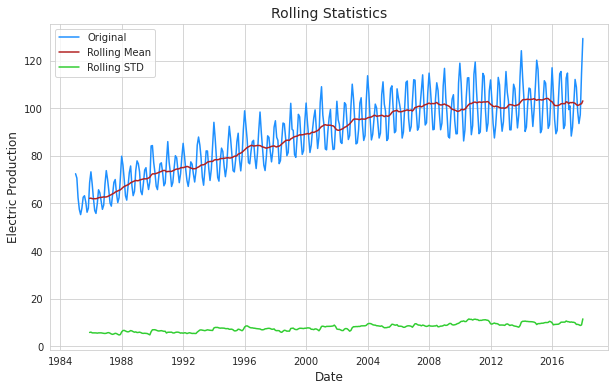

In [ ]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()  
plt.figure(figsize =(10,6))
plt.plot(df, color='dodgerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label = 'Rolling Mean')
plt.plot(rolling_std, color='limegreen', label= 'Rolling STD')
plt.xlabel('Date', size=12)
plt.ylabel('Electric Production', size =12)
plt.legend(loc= 'upper left')
plt.title('Rolling Statistics', size =14)
plt.show()